<a href="https://colab.research.google.com/github/tanakatanakajava/public_machine_learning/blob/main/MNIST_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# MNISTデータセットをインポート
from keras.datasets import mnist

# MNISTデータセットの読み込み
(x_trains, y_trains), (x_tests, y_tests) = mnist.load_data()

# 訓練データ
# 60000x28x28の3次元配列を60000×28×28×1の4次元配列に変換
x_trains = x_trains.reshape(60000, 28, 28, 1)
x_trains = x_trains.astype('float32') # float32型に変換
x_trains /= 255                      # 0から1.0の範囲に変換
correct = 10                        # 正解ラベルの数
# 正解ラベルを1-of-K符号化法で変換
y_trains = np_utils.to_categorical(y_trains, correct)

# テストデータ
# 10000x28x28の3次元配列を10000×28×28×1の4次元配列に変換
x_tests = x_tests.reshape(10000, 28, 28, 1)
# テストデータをfloat32(浮動小数点数)型に変換
x_tests = x_tests.astype('float32') # float32型に変換
x_tests /= 255                     # 0から1.0の範囲に変換
# 正解ラベルをワンホット表現に変換
y_tests = np_utils.to_categorical(y_tests, correct)

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()                      # Sequentialオブジェクトの生成

# （第1層）畳み込み層1
# ニューロン数：32
# 出力：1ニューロンあたり(28, 28, 1)の3階テンソルを16個出力
model.add(Conv2D(filters=27,              # フィルターの数は32
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 input_shape=(28, 28, 1), # 入力データのサイズ
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

# （第2層）プーリング層1
model.add(
    MaxPooling2D(pool_size=(4, 3)))       # 縮小対象の領域は2×2
    # 3*4 <4*3 is best >4*4

# ドロップアウト層
#　ドロップアウト層を消すと、正解率が下がる 25%がBest
model.add(Dropout(0.25))                   # ドロップアウトは25％→27.5(上がる)
                                           # ドロップアウトは25％→15%(下がる)
#Flaten層
model.add(Flatten())

# （第3層）全結合層
# ニューロン数：16
model.add(Dense(18,                      # ニューロン数は128
                activation='relu'         # 活性化関数はReLU
               ))

# （第4層）出力層
# ニューロン数：10
# 出力：要素数(10)の1階テンソルを出力
model.add(Dense(10,                       # 出力層のニューロン数は10
                activation='softmax'      # 活性化関数はソフトマックス
               ))

# Sequentialオブジェクトのコンパイル
model.compile(
    loss='categorical_crossentropy',      # 損失の基準は交差エントロピー誤差
    optimizer=Adam(),                     # 学習方法をAdamにする
    metrics=['accuracy']                  # 学習評価として正解率を指定
    )

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 27)        270       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 9, 27)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 7, 9, 27)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 1701)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 18)                30636     
_________________________________________________________________
dense_69 (Dense)             (None, 10)                190       
Total params: 31,096
Trainable params: 31,096
Non-trainable params: 0
_________________________________________________

In [ ]:
# 学習を行って結果を出力
epochs = 20
batchs = 50 #50 val_accuracy: 0.9870 20: 0.9877
#しょぼいプログラムだと、batchを増やしても大差ない


history = model.ﬁt(x_trains,            # 訓練データ
                   y_trains,          # 正解ラベル 
                   batch_size=batchs,      # 勾配計算に用いるミニバッチの数 
                   epochs=epochs,           # 学習を繰り返す回数
                   verbose=1,           # 学習の進捗状況を出力する
                   validation_data=(
                       x_tests, y_tests # テストデータの指定
                   ))

Epoch 1/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0193 - accuracy: 0.9931 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0400 - val_accuracy: 0.9889
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0183 - accuracy: 0.9935 - val_loss: 0.0420 - val_accuracy: 0.9884
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0432 - val_accuracy: 0.9885
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0421 - val_accuracy:

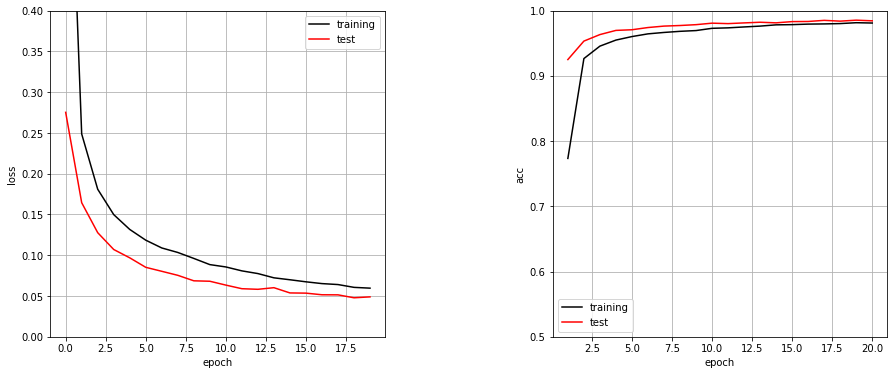

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.5)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 0.4)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(range(1,epochs+1),history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(range(1,epochs+1),history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()